In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import numpy as np
import pandas as pd

import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///./hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [14]:
# Create our session (link) from Python to the DB
past_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23")

past_year_df = pd.DataFrame(past_year_data)
past_year_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [15]:
past_year_df['date'] = pd.to_datetime(past_year_df['date'])

past_year_df.set_index('date', inplace=True)

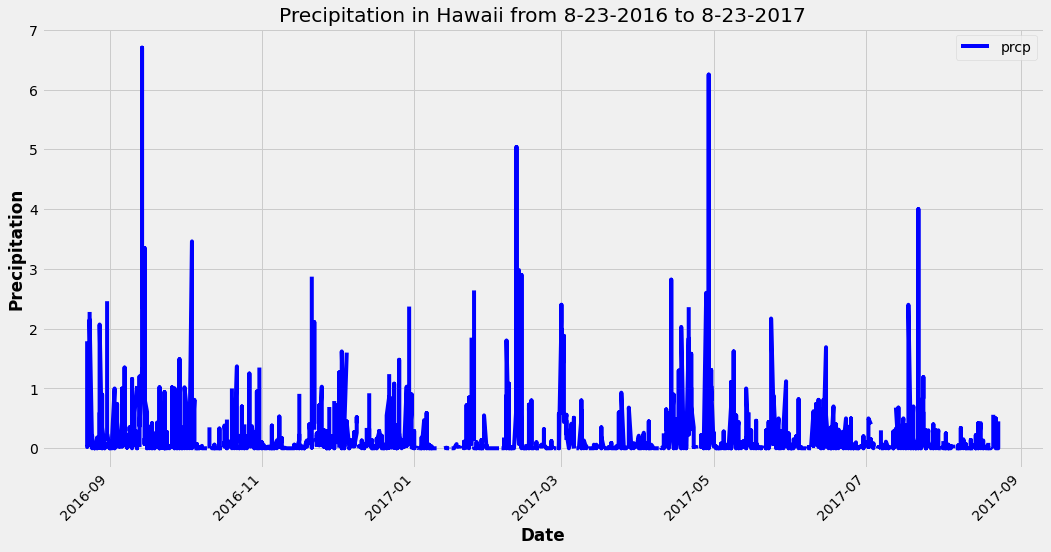

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
precipitation_chart = past_year_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 8-23-2016 to 8-23-2017")
plt.savefig('./Precipitation_Analysis.png')
plt.show()

summary_stats = past_year_df.describe()
summary_stats

In [17]:
#Calculate Number of Stations
no_of_stations = session.query(Station.station).count()
print(no_of_stations)


9


In [19]:
most_active_stations = session.query(Station.station, func.count(Measurement.tobs)).\
   filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Climate of Most Active Query
KualoaRanchTOP = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station=="USC00519281").all()

In [25]:
KualoaRanchTOPDF = pd.DataFrame(data=KualoaRanchTOP, columns=["station", "date", "tobs"])    
KualoaRanchTOPDF = KualoaRanchTOPDF.drop(columns="station", axis=1)
KualoaRanchTOPDF.set_index('date', inplace=True)

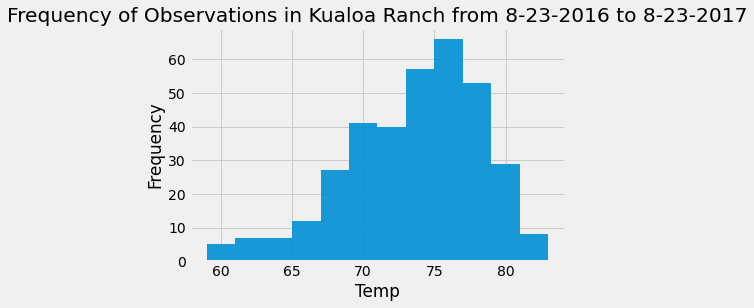

In [27]:
temp = KualoaRanchTOPDF['tobs']
num_bins = 12
temp_chart = plt.hist(temp, num_bins, label='tobs', alpha=0.9)
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.title("Frequency of Observations in Kualoa Ranch from 8-23-2016 to 8-23-2017")
plt.savefig('./Climate_Analysis.png')
plt.show()